<a href="https://colab.research.google.com/github/uoahy-6uoas/HG-Machine/blob/2-2-edit/hg2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**데이터 전처리**
* 앞의 모델에서는 [25,150]의 bream을 smelt로 분류하는 문제 발생<br>
> 데이터 전처리란 데이터를 분석 및 처리에 적합한 형태로 만드는 과정을 총칭합니다. _모두의연구소_

In [5]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [9]:
import numpy as np
fish_data = np.column_stack((fish_length,fish_weight)) # np.column 2차원 배열로 한번에 만들기
fish_target = np.concatenate((np.ones(35),np.zeros(14))) # np.concatenate 두 배열 합침
#두 클래스 모두 인풋이 튜플이나 리스트타입 이어야함

In [16]:
from sklearn.model_selection import train_test_split #훈련-테스트데이터 나눠줌
train_input,test_input,train_target, test_target = train_test_split(fish_data,fish_target, stratify=fish_target, random_state=42) #stratify로 타겟의 비율에 맞게 나눔

In [18]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [22]:
kn.predict([[25,150]]) #bream이어야 할 데이터가 smelt로 나옴

array([0.])

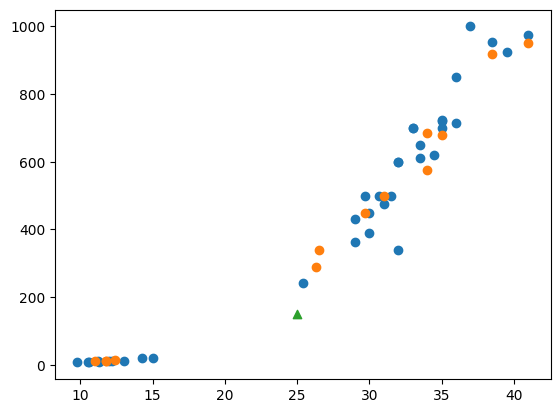

In [24]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0],test_input[:,1])
plt.scatter(25,150, marker='^')
plt.show()

육안으로 봤을 때는 bream이지만 모델은 smelt라고 하는 이유 = scale이 다르기 때문
<br>거리가 진짜 가까운지 확인해보자

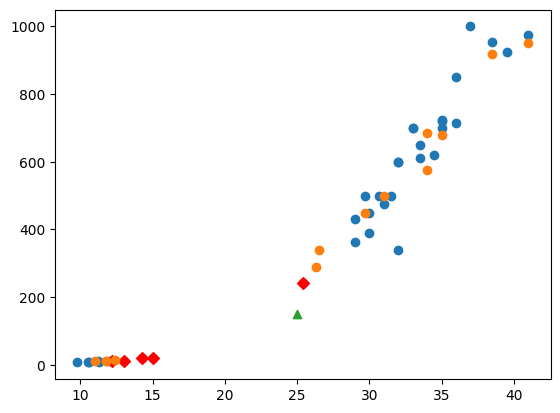

In [30]:
distances, indexes = kn.kneighbors([[25,150]])
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(train_input[indexes,0], train_input[indexes,1], color='red', marker='D')
plt.scatter(test_input[:,0],test_input[:,1])
plt.scatter(25,150, marker='^')
plt.show()
# 빨간색이 모델이 참조하는 5개의 인덱스임

print(distances) 해보면 우상단 마름모까지는 92, 좌하단 마름모 까지는 130인데 이는 scatter에서 보이는 직관과 맞지 않다.<br>(수학적으로는 당연히 맞음)<br>
따라서 x,y축을 적절하게 스케일링 해줄 필요가 있다.(이 작업(스케일링=표준점수)은 **데이터전처리**의 한 방법)

표준점수는 각 데이터가 원점에서 몇 표준편차만큼 떨어져 있는지 나타냄 == 평균을 빼고 표준편차를 나눔(확통의 Z-스케일)

In [31]:
#표준점수 계산법
mean = np.mean(train_input, axis=0) #axis=0 : 행을 따라 계산
std = np.std(train_input, axis=0)
train_scaled = (train_input-mean)/std # 와! 브로드캐스팅!

In [33]:
#책에는 없지만 훈련셋에 맞춰 predict, test 셋 다 전처리해보자
test_scaled = (test_input - mean)/std
scaled = ([25,150] - mean)/std

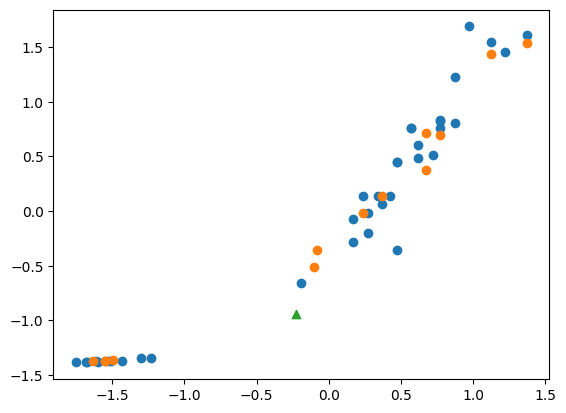

In [36]:
#show urself
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(test_scaled[:,0],test_scaled[:,1])
plt.scatter(scaled[0], scaled[1], marker='^')
plt.show()

In [38]:
#위 데이터로 다시 fit해보자
kn.fit(train_scaled, train_target)
kn.score(test_scaled, test_target)
kn.predict([scaled])

array([1.])

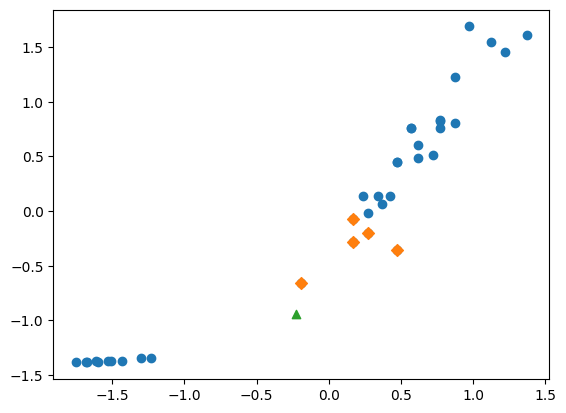

In [41]:
#맞았으니 아까처럼 가까운 5개 추출해 시각화 해보자
distance_edit, indexes_edit = kn.kneighbors([scaled])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(train_scaled[indexes_edit,0], train_scaled[indexes_edit,1],marker='D')
plt.scatter(scaled[0], scaled[1], marker='^')
plt.show()

**확인문제**
1. 스케일 조정 방식의 하나로 특성값을 0에서 표준편차의 몇배수 만큼 떨어져 았는지 변환한 값 = 표준점수
2. 테스트 세트의 스케일을 조정할 때, 어떤 데이터의 통계값을 사용해야 하나? = 훈련세트

ch2 fin.